In [43]:
import pathlib
import yaml
import numpy as np

# load examples & calibrations from the collection
collection = pathlib.Path("../collections/armor_plates_9-14-25")
assert collection.exists()

examples = collection / "examples"
calibrations = collection / "calibrations"

assert examples.exists() and calibrations.exists()

calib = next(calibrations.iterdir())
print(str(calib))
calib = yaml.load(calib.read_text(), Loader=yaml.Loader)
print(f"RMS: {calib["RMS"]}")
print(f"Resolution: {calib["Resolution"]}")

# fisheye intrinsics
K = np.array(calib["K"])
D = np.array(calib["D"])

K, D

../collections/armor_plates_9-14-25/calibrations/right_b20250925_214835.yaml
RMS: 1.2445149678661414
Resolution: [1920, 1080]


(array([[1.02795250e+03, 0.00000000e+00, 9.49586606e+02],
        [0.00000000e+00, 1.02885846e+03, 5.50175779e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.03503201],
        [-0.00934527],
        [ 0.01370087],
        [-0.00745125]]))

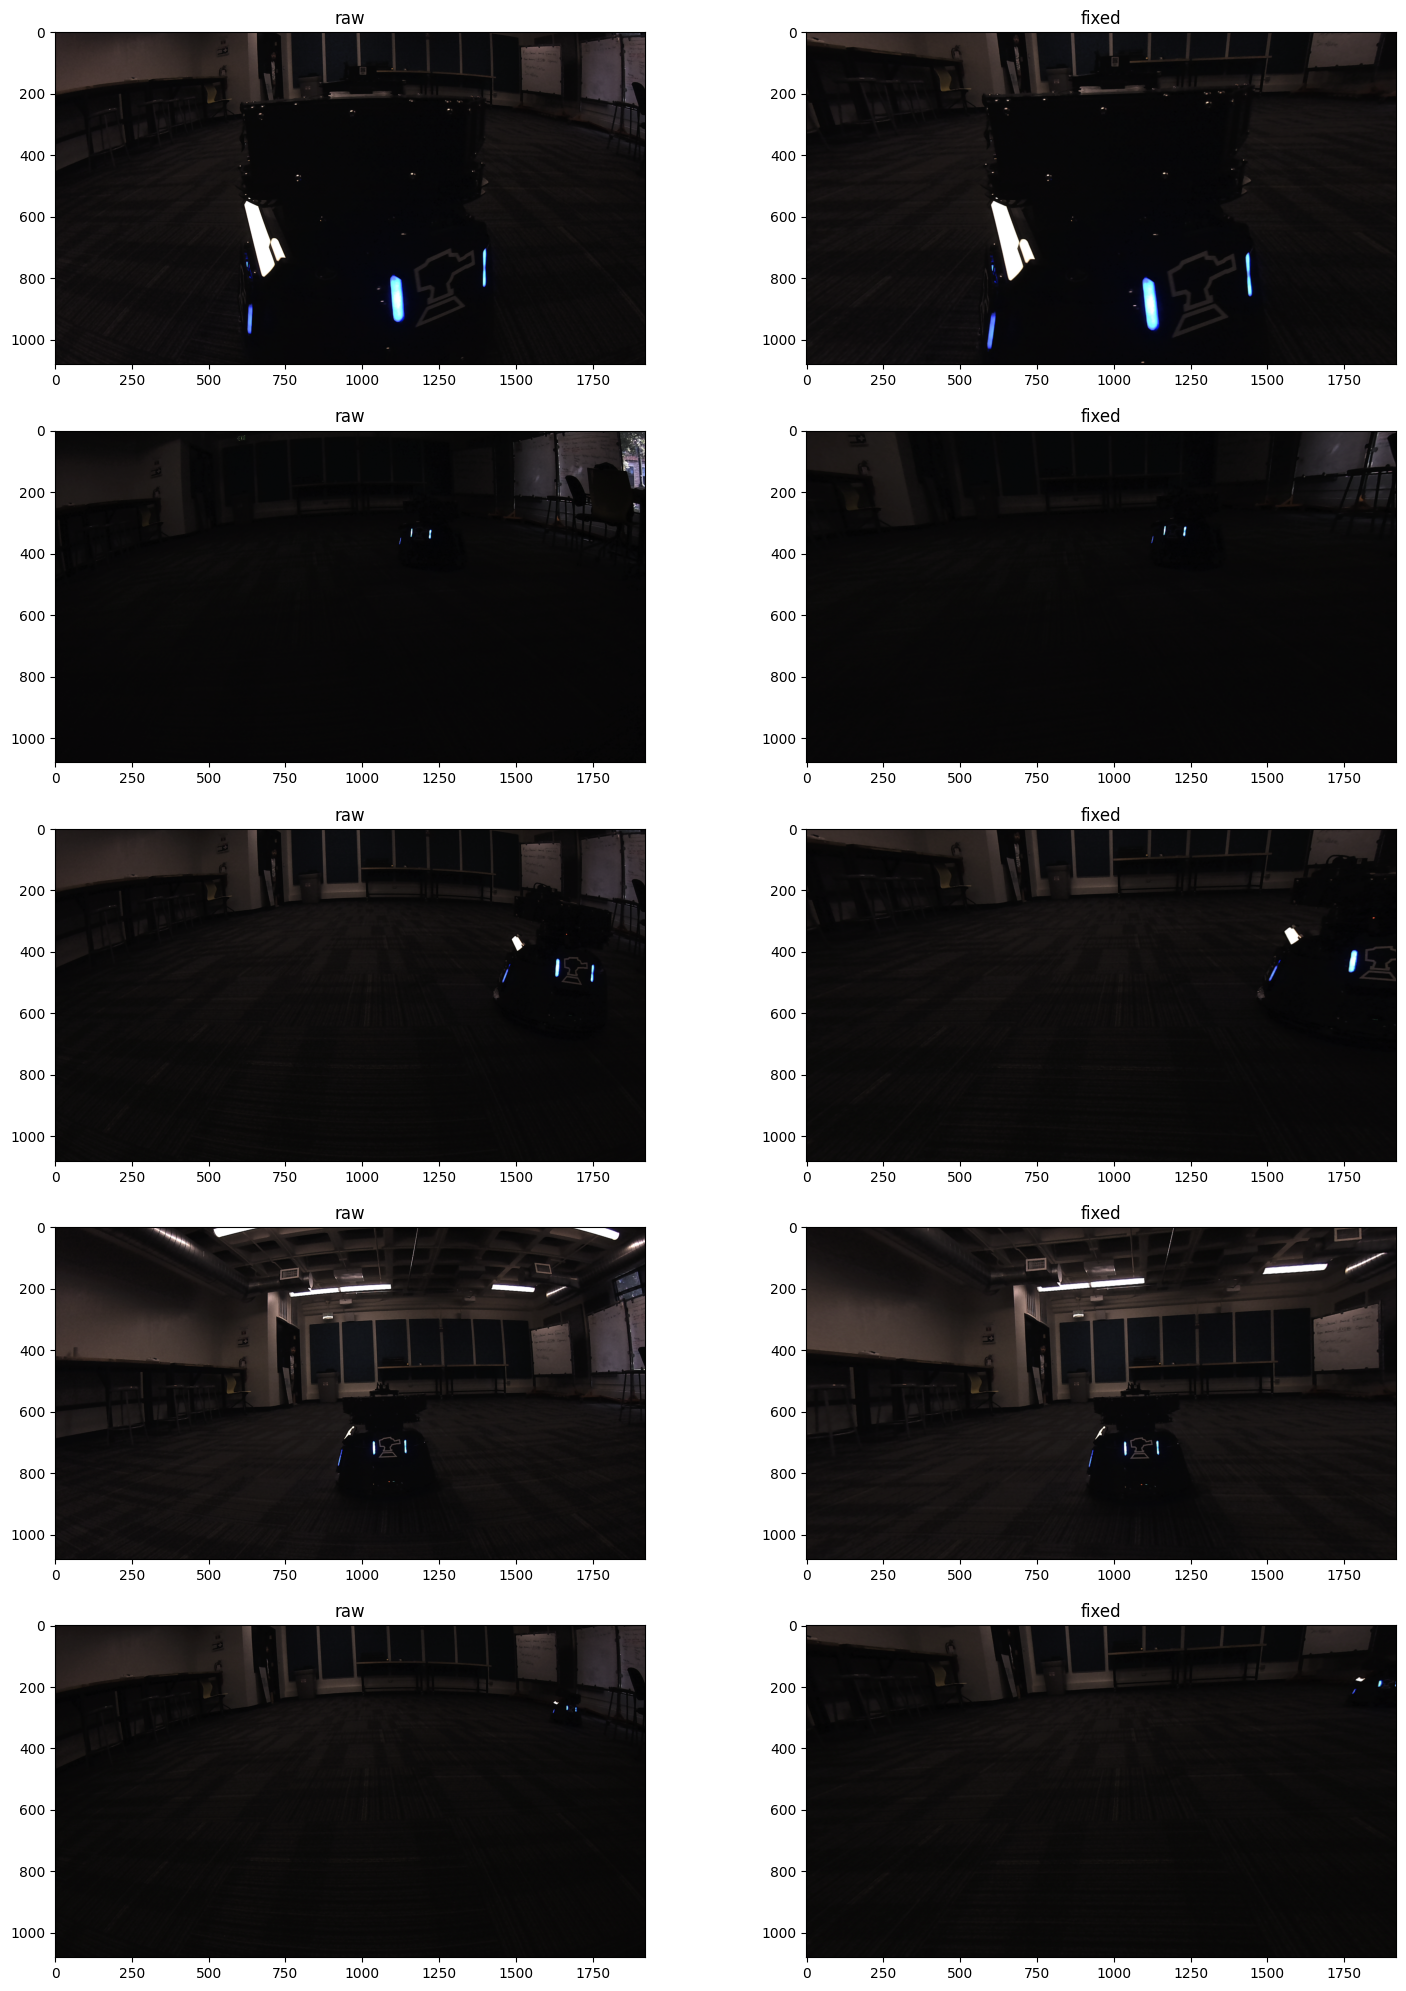

In [46]:
import cv2
import matplotlib.pyplot as plt

def partition(l: list, size: int):
    for i in range(0, len(l), size):
        yield l[i:i+size]

# examine calibration results on sample images
num_samples = 5
raws = list(examples.iterdir())[:num_samples]

W, H = 1920, 1080
aspect = W / H
vh = 5
fig, axes = plt.subplots(len(raws), 2, figsize=(2*aspect*vh, len(raws)*vh))
ax_pairs = list(partition(axes.flat, 2))

# remap init
x_map, y_map = cv2.fisheye.initUndistortRectifyMap(K, D, R=np.eye(3), P=K.copy(), size=(W, H), m1type=cv2.CV_16SC2)

for raw_path, ax_pair in zip(examples.iterdir(), ax_pairs):
    imgs = {}
    imgs["raw"] = cv2.imread(raw_path)
    imgs["fixed"] = cv2.remap(imgs["raw"], x_map, y_map, interpolation=cv2.INTER_LINEAR)
    
    # show image
    for i, (name, img) in enumerate(imgs.items()):
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax_pair[i].imshow(rgb)
        ax_pair[i].set_title(name)